<a href="https://colab.research.google.com/github/ximenasansu/Extra-SII/blob/main/Ejercicio%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3

In [40]:
pip install yfinance        #instalamos yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import yfinance as yf
import pandas as pd
import numpy as np

META = yf.Ticker("META")            #meta platforms anteriormente Facebook es un conglomerado de tecnología y redes sociales
print(META.info) 

{'zip': '94025', 'sector': 'Communication Services', 'fullTimeEmployees': 77805, 'longBusinessSummary': "Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality relat

In [42]:
import datetime
 
startDate = datetime.datetime(2021, 7, 1)   # Fecha inicial
 
endDate = datetime.datetime(2022, 4, 30)    # Abril solo tiene 30 dias

df = META.history(start=startDate, end=endDate)
df.shape
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-01,346.820007,354.670013,346.500000,354.390015,17137000,0,0
2021-07-02,355.100006,356.440002,352.619995,354.700012,11521300,0,0
2021-07-06,356.500000,358.790009,349.179993,352.779999,13488500,0,0
2021-07-07,355.260010,356.489990,350.000000,350.489990,14218900,0,0
2021-07-08,345.730011,348.329987,342.559998,345.649994,14406500,0,0
...,...,...,...,...,...,...,...
2022-04-25,182.729996,187.179993,181.660004,186.990005,29281100,0,0
2022-04-26,186.630005,187.190002,179.500000,180.949997,31747400,0,0
2022-04-27,174.429993,181.210007,169.000000,174.949997,71062900,0,0


In [43]:
df = df.iloc[:,3:4]      #Seleccionamos de la tabla anterior
df.head()

,Close
Date,
2021-07-01,354.390015
2021-07-02,354.700012
2021-07-06,352.779999
2021-07-07,350.489990
2021-07-08,345.649994


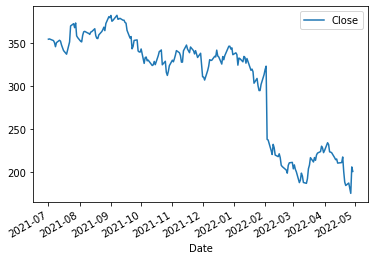

In [44]:
df.plot(y='Close')       #Gráficamos

In [45]:
df.isnull().sum()       #Devuelve el número de valores faltantes en el conjunto de datos.

Close    0
dtype: int64

In [46]:
cum_return = (df.iloc[-1] - df.iloc[0]) / df.iloc[0]         #C´lculamos rendimiento esperado
print(f'Rendimiento acumulado {cum_return * 100}')

Rendimiento acumulado Close   -43.432379
dtype: float64


In [47]:
df['Log_return'] = np.log(1 + df.pct_change())    #incuimos log return 
df

,Close,Log_return
Date,,
2021-07-01,354.390015,NaN
2021-07-02,354.700012,0.000874
2021-07-06,352.779999,-0.005428
2021-07-07,350.489990,-0.006512
2021-07-08,345.649994,-0.013905
...,...,...
2022-04-25,186.990005,0.015522
2022-04-26,180.949997,-0.032834
2022-04-27,174.949997,-0.033721


In [48]:
print(f'El rendimiento promedio es {df.Log_return.mean()}')

El rendimiento promedio es -0.0027259972596037152


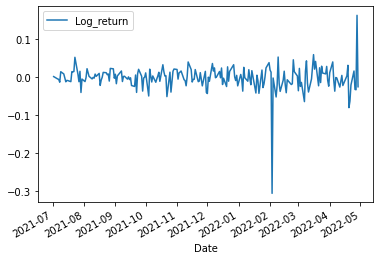

In [49]:
df.plot(y='Log_return')

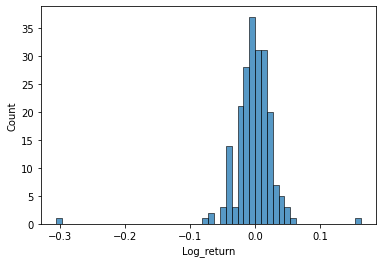

In [50]:
import seaborn as sns                   #histograma

sns.histplot(data=df, x='Log_return')

La distribucion de los rendimientos pareciera ser una distribucion normal, pero hay datos atipicos en ambas colas de la distribucion.

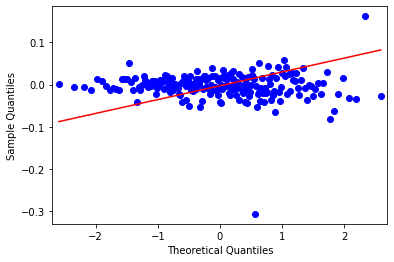

In [51]:
import numpy as np                       #Gráfica cuantil-cuantil
import statsmodels.api as sm
import pylab as py
   
  
sm.qqplot(df.iloc[1:,1:2].values, 
          dist='norm',
          line ='s')
py.show()

In [52]:
from scipy import stats

stats.kstest(df.iloc[1:,1:2].values, 'norm')

KstestResult(statistic=0.6203463619334725, pvalue=4.454134109650435e-78)

El test de Kolmogorov de dos colas nos dio un p-value=1.42x10^-73, por lo que se rechaza la hipotesis nula que afirma que ambas distribuciones son indenticas. Pero esto puede ser por la presencia de valores atipicos, haremos el mismo test sin dichos valores.

In [53]:
qry = "(Log_return.mean() - 2*Log_return.std())" +\
            " <= Log_return <= " + \
            "(Log_return.mean() + 2*Log_return.std())"
     

df_sin_atipicos = df.query(qry)

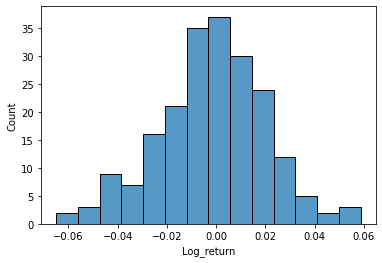

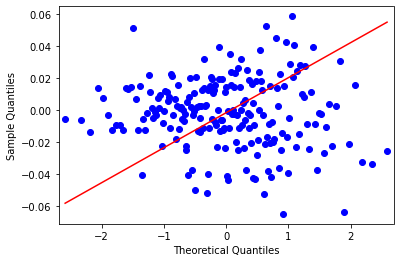

In [54]:
import numpy as np
import statsmodels.api as sm
import pylab as py
   
sns.histplot(data=df_sin_atipicos, x='Log_return')
  
sm.qqplot(df_sin_atipicos.iloc[1:,1:2].values, 
          dist='norm',
          line ='s')
py.show()

In [55]:
from scipy import stats

stats.kstest(df_sin_atipicos.iloc[1:,1:2].values, 'norm')

KstestResult(statistic=0.5259123908710244, pvalue=2.3161250539029205e-53)

El resultado sigue siendo el mismo

In [56]:
df

,Close,Log_return
Date,,
2021-07-01,354.390015,NaN
2021-07-02,354.700012,0.000874
2021-07-06,352.779999,-0.005428
2021-07-07,350.489990,-0.006512
2021-07-08,345.649994,-0.013905
...,...,...
2022-04-25,186.990005,0.015522
2022-04-26,180.949997,-0.032834
2022-04-27,174.949997,-0.033721


# 80/20

In [57]:
train_size = int(210*.8)
test_size = 210 - train_size
X_train = df.iloc[:train_size,1:2]
X_test = df.iloc[train_size:,1:2]
X_train.shape, X_test.shape

((168, 1), (42, 1))

In [75]:
u = X_train.mean()
var = X_train.var()
drift = u - (0.5*var)
print(u,var)

Log_return   -0.00235
dtype: float64 Log_return    0.000952
dtype: float64


In [59]:
from scipy.stats import norm

stdev = X_train.std()
days = X_test.shape[0]
trials = 100
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [60]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = X_train.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

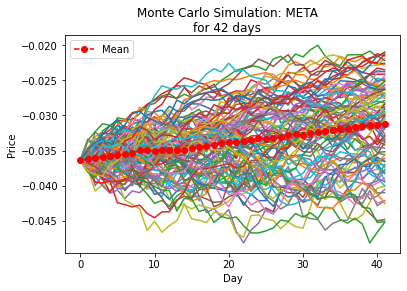

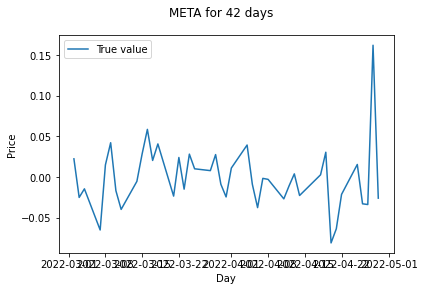

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: META\nfor 42 days")
plt.plot(price_paths)
plt.plot(pd.DataFrame(price_paths).transpose().mean(), linestyle='dashed', marker='o', color='red', label='Mean')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

fig = plt.figure()
fig.suptitle("META for 42 days")
plt.plot(X_test, label='True value')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

#70/30

(147, 1) (63, 1)


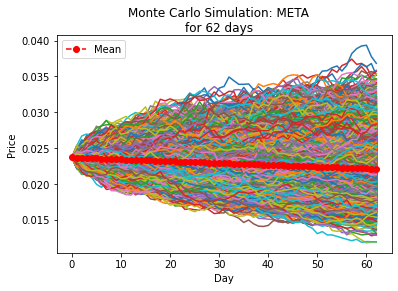

In [62]:
train_size = int(210*.7)
test_size = 210 - train_size

X_train = df.iloc[:train_size,1:2]
X_test = df.iloc[train_size:,1:2]

print(X_train.shape, X_test.shape)

u = X_train.mean()
var = X_train.var()
drift = u - (0.5*var)

stdev = X_train.std()
days = X_test.shape[0]
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

price_paths = np.zeros_like(daily_returns)
price_paths[0] = X_train.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: META\nfor 62 days")
plt.plot(price_paths)
plt.plot(pd.DataFrame(price_paths).transpose().mean(), linestyle='dashed', marker='o', color='red', label='Mean')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

#90/10

(189, 1) (21, 1)


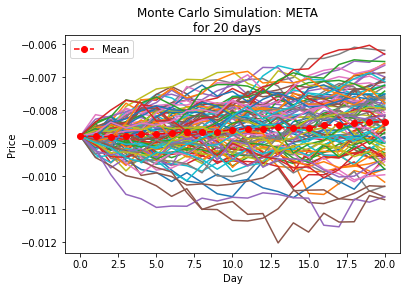

In [63]:
train_size = int(210*.9)
test_size = 210 - train_size

X_train = df.iloc[:train_size,1:2]
X_test = df.iloc[train_size:,1:2]

print(X_train.shape, X_test.shape)

u = X_train.mean()
var = X_train.var()
drift = u - (0.5*var)

stdev = X_train.std()
days = X_test.shape[0]
trials = 100
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

price_paths = np.zeros_like(daily_returns)
price_paths[0] = X_train.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: META\nfor 20 days")
plt.plot(price_paths)
plt.plot(pd.DataFrame(price_paths).transpose().mean(), linestyle='dashed', marker='o', color='red', label='Mean')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

A mas datos para el entrenamiento parece ser que la simulacion es mas robusta, aun así solo estamos asumiendo que los retornos siguen una distribucion normal, pero los datos dicen otra cosa. Pero si aumentamos los intentos, la distribucion es lo suficientemente robusta.

Por lo que no usaria este metodo para predecir precios de acciones a menos de que se encuentre una distribucion mas adecuada para los retornos, tal vez la de Cauchy podria funcionar. O usar otros metodos como las redes neuronales o regresiones basadas en arboles como el Xgradient Boosting.

De todas formas, la simulacion nos da una idea de como se comportaran las acciones, que es un buen punto de partida para un analisis mas complejo.